# Family Member Financial Transaction Data

The dataset contains financial transaction records for a family member, tracking various expenses across different categories on Oct 24 .
## Columns:

1. **Family ID**:  
   A unique identifier for the family (e.g., `FAM001`).

2. **Member ID**:  
   A unique identifier for the family member (e.g., `FAM001_Member1`).

3. **Transaction Date**:  
   The date when the transaction occurred (e.g., `07-10-2024`).

4. **Category**:  
   The type of transaction (e.g., `Travel`, `Groceries`, `Healthcare`, etc.).

5. **Amount**:  
   The amount spent in the transaction (e.g., `409.12` for the first transaction).

6. **Income**:  
   The monthly income of the family member at the time of transaction (e.g., `113810`).

7. **Savings**:  
   The savings of the family member at the time of the transaction (e.g., `20234`).

8. **Monthly Expenses**:  
   The monthly expenses for the family member (e.g., `5781`).

9. **Loan Payments**:  
   Monthly payments made towards any loans (e.g., `2422`).

10. **Credit Card Spending**:  
    Monthly credit card spending by the family member (e.g., `2959`).

11. **Dependents**:  
    The number of dependents the family member is financially responsible for (e.g., `2`).

12. **Financial Goals Met (%)**:  
    The percentage of the family member’s financial goals met (e.g., `68%`).

---

## Summary of Transactions

The data tracks several financial transactions made by the family member in **October 2024**, across the following categories:

---

## Usage

This dataset can be used in various ways:

- **Budgeting and Financial Planning**:  
  Track monthly expenses, savings, and income to help users manage their finances effectively.

- **Financial Goal Monitoring**:  
  Assess whether the family member is meeting their financial goals based on their income, savings, and expenses.

- **Predictive Modeling**:  
  Analyze spending patterns to forecast future expenses and financial behavior.

---


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
df = pd.read_csv('family_financial_and_transactions_data.csv')

In [145]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68


In [71]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=0]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Family ID 0.0 % missing values
Member ID 0.0 % missing values
Category 0.0 % missing values
Amount 0.0 % missing values
Income 0.0 % missing values
Savings 0.0 % missing values
Monthly Expenses 0.0 % missing values
Loan Payments 0.0 % missing values
Credit Card Spending 0.0 % missing values
Dependents 0.0 % missing values
Financial Goals Met (%) 0.0 % missing values
Day 0.0 % missing values


In [72]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Day
count,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006,16.023979
std,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304,8.946492
min,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000,1.000000
25%,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000,8.000000
50%,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000,16.000000
75%,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000,24.000000
max,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000,31.000000


In [74]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features),num_features )

Num of Numerical Features : 9 ['Amount', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)', 'Day']


In [6]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features),cat_features )


Num of Categorical Features : 4 ['Family ID', 'Member ID', 'Transaction Date', 'Category']


In [76]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features), discrete_features)

Num of Discrete Features : 1 ['Dependents']


In [84]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features), continuous_features)

Num of Continuous Features : 8 ['Amount', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending', 'Financial Goals Met (%)', 'Day']


### 1. a. TOP 5  Total Spending Per Member


In [50]:

total_spending = df.groupby(['Member ID'])['Amount'].sum().reset_index()
total_spending = total_spending.sort_values(by='Amount', ascending=False)

total_spending.head(5)

,Member ID,Amount
605,FAM133_Member4,9509.20
228,FAM050_Member1,8773.50
545,FAM120_Member2,8728.50
724,FAM158_Member2,8695.13
813,FAM176_Member4,8640.37


### b. TOP 5 Spending by Category Per Member

In [51]:
# Spending by category per member
category_spending = df.groupby(['Member ID', 'Category'])['Amount'].sum().reset_index()
category_spending = category_spending.sort_values(by='Amount', ascending=False)

category_spending.head(5)


,Member ID,Category,Amount
2490,FAM089_Member5,Education,3140.58
5552,FAM196_Member7,Healthcare,2909.96
1411,FAM050_Member2,Utilities,2851.73
3904,FAM140_Member3,Groceries,2850.64
4282,FAM152_Member2,Travel,2850.22


 ### c. Top 5 Spending Member  daywise

In [251]:
# Convert Transaction_Date to datetime (if not already done)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d-%m-%Y')

# Extract Day from Transaction Date
df['Day'] = df['Transaction Date'].dt.day

# Spending by member and day
daily_spending = df.groupby(['Member ID', 'Transaction Date'])['Amount'].sum().reset_index()

# Sort daily spending by amount in ascending order
daily_spending = daily_spending.sort_values(by='Amount', ascending=False)

# Display the first few rows
daily_spending.head(5)



,Member ID,Transaction Date,Amount
1958,FAM034_Member4,2024-10-07,1804.42
2224,FAM037_Member4,2024-10-27,1773.47
8312,FAM140_Member3,2024-10-10,1727.11
1124,FAM019_Member3,2024-10-04,1705.91
11095,FAM185_Member1,2024-10-25,1702.48


### d. Top 5  Average spending per transaction

In [54]:

avg_spending = df.groupby(['Member ID'])['Amount'].mean().reset_index()
avg_spending = avg_spending.sort_values(by='Amount', ascending=False)

avg_spending.head(5)


,Member ID,Amount
204,FAM044_Member1,417.398750
873,FAM190_Member5,398.186667
827,FAM180_Member1,390.478333
805,FAM175_Member2,370.201429
507,FAM112_Member7,368.897143


### e. Frequency of transactions per member

In [55]:
# Frequency of transactions per member
transaction_frequency = df.groupby(['Member ID']).size().reset_index(name='Transaction_Count')
transaction_frequency = transaction_frequency.sort_values(by='Transaction_Count', ascending=False)

print(transaction_frequency)


          Member ID  Transaction_Count
25   FAM006_Member3                 30
888  FAM194_Member1                 30
559  FAM123_Member2                 30
383  FAM084_Member2                 30
894  FAM194_Member7                 30
..              ...                ...
256  FAM056_Member1                  5
435  FAM095_Member6                  5
262  FAM057_Member2                  5
810  FAM176_Member1                  5
622  FAM138_Member1                  5

[926 rows x 2 columns]


### 1.1 a. TOP 5  Spending Per family

In [ ]:

family_spending = df.groupby('Family ID')['Amount'].sum().reset_index()
family_spending = family_spending.sort_values(by='Amount', ascending=False)
print("Family-Level Spending Patterns")
family_spending.head()

Family-Level Spending Patterns


,Family ID,Amount
49,FAM050,43880.14
193,FAM194,41655.65
4,FAM005,40246.21
186,FAM187,40052.84
80,FAM081,37314.40


### b. TOP 5 Spending by Category Per Famliy

In [56]:
# Spending by category per member
category_spending = df.groupby(['Family ID', 'Category'])['Amount'].sum().reset_index()
category_spending = category_spending.sort_values(by='Amount', ascending=False)

category_spending.head(5)


,Family ID,Category,Amount
31,FAM005,Groceries,8802.50
349,FAM050,Utilities,8641.33
344,FAM050,Entertainment,8109.43
202,FAM029,Utilities,8020.88
1354,FAM194,Travel,7850.61


### c. Top 5 Spending by Family  day wise 

In [ ]:

daily_spending = df.groupby(['Family ID', 'Transaction Date'])['Amount'].sum().reset_index()

# Sort daily spending by amount in ascending order
daily_spending = daily_spending.sort_values(by='Amount', ascending=False)

# Display the first few rows
daily_spending.head(5)

,Family ID,Transaction Date,Amount
5420,FAM199,2024-10-13,3527.48
1360,FAM050,2024-10-31,3323.92
4125,FAM151,2024-10-19,3280.77
1922,FAM071,2024-10-21,3124.74
171,FAM007,2024-10-02,3080.70


### d. Top 5 Avg spending per family 

In [60]:

avg_spending = df.groupby(['Family ID'])['Amount'].mean().reset_index()
avg_spending = avg_spending.sort_values(by='Amount', ascending=False)

avg_spending.head(5)


,Family ID,Amount
132,FAM133,298.970500
43,FAM044,298.359200
75,FAM076,296.922619
156,FAM157,290.445000
172,FAM173,286.777045


### e.Frequency of transactions per Famliy 

In [ ]:

transaction_frequency = df.groupby(['Family ID']).size().reset_index(name='Transaction_Count')
transaction_frequency = transaction_frequency.sort_values(by='Transaction_Count', ascending=False)

transaction_frequency.head(5)


,Family ID,Transaction_Count
193,FAM194,167
4,FAM005,165
186,FAM187,156
49,FAM050,155
70,FAM071,144


In [65]:
# Drop the 'Transaction Date' column
df.drop(columns=['Transaction Date'], inplace=True)

In [66]:
df.describe()

,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Day
count,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006,16.023979
std,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304,8.946492
min,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000,1.000000
25%,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000,8.000000
50%,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000,16.000000
75%,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000,24.000000
max,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000,31.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Family ID                16306 non-null  object 
 1   Member ID                16306 non-null  object 
 2   Category                 16306 non-null  object 
 3   Amount                   16306 non-null  float64
 4   Income                   16306 non-null  int64  
 5   Savings                  16306 non-null  int64  
 6   Monthly Expenses         16306 non-null  int64  
 7   Loan Payments            16306 non-null  int64  
 8   Credit Card Spending     16306 non-null  int64  
 9   Dependents               16306 non-null  int64  
 10  Financial Goals Met (%)  16306 non-null  int64  
 11  Day                      16306 non-null  int32  
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 1.4+ MB


### Correlation Between Spending and Financial Goals Met

In [82]:
goals_spending = df.groupby(['Family ID', 'Member ID']).agg(
    Total_Spending=('Amount', 'sum'),
    Avg_Goals_Met=('Financial Goals Met (%)', 'mean')
).reset_index()

# Filter for members meeting more than 60% of their goals
goals_spending = goals_spending[goals_spending['Avg_Goals_Met'] > 60]

print(goals_spending.sort_values(by='Avg_Goals_Met', ascending=False)
)


    Family ID       Member ID  Total_Spending  Avg_Goals_Met
421    FAM093  FAM093_Member1         6384.62          100.0
414    FAM091  FAM091_Member1         6384.26          100.0
418    FAM091  FAM091_Member5         2900.42          100.0
48     FAM010  FAM010_Member6         3431.21          100.0
47     FAM010  FAM010_Member5         3081.04          100.0
..        ...             ...             ...            ...
102    FAM022  FAM022_Member2         2216.13           61.0
467    FAM103  FAM103_Member1         2114.26           61.0
468    FAM103  FAM103_Member2         5620.01           61.0
469    FAM103  FAM103_Member3         7853.50           61.0
470    FAM103  FAM103_Member4         2465.38           61.0

[441 rows x 4 columns]


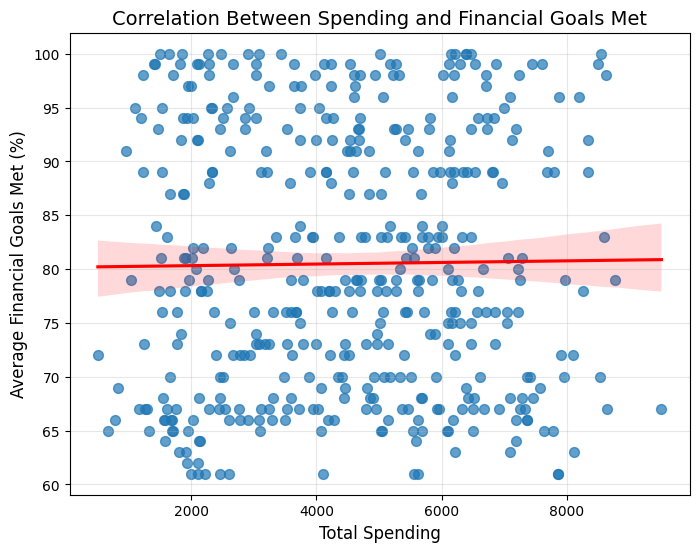

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with a regression line to show correlation
plt.figure(figsize=(8, 6))
sns.regplot(
    data=goals_spending, 
    x='Total_Spending', 
    y='Avg_Goals_Met', 
    scatter_kws={'s': 50, 'alpha': 0.7}, 
    line_kws={'color': 'red'}
)

# Add titles and labels
plt.title("Correlation Between Spending and Financial Goals Met", fontsize=14)
plt.xlabel("Total Spending", fontsize=12)
plt.ylabel("Average Financial Goals Met (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()



### Based on the provided data snippet, there might be no strong correlation between Total Spending and Average Financial Goals Met.


## Check for multicollinearity


In [111]:
numeric_cols = df.select_dtypes(exclude = "object").columns


In [113]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = df[numeric_cols]
vif_data = pd.DataFrame({
    "feature": vif_df.columns,
    "VIF": [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]
})
print(vif_data.head(17))

                   feature       VIF
0                   Amount  4.017543
1                   Income  6.027735
2                  Savings  3.346539
3         Monthly Expenses  5.546164
4            Loan Payments  3.965611
5     Credit Card Spending  6.121968
6               Dependents  5.193753
7  Financial Goals Met (%)  6.249321
8                      Day  3.953354


In [86]:
# Select relevant columns for analysis
financial_metrics = df[['Income', 'Monthly Expenses', 'Savings', 'Amount', 'Loan Payments']]

# Compute the correlation matrix
correlation_matrix = financial_metrics.corr()

print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,Income,Monthly Expenses,Savings,Amount,Loan Payments
Income,1.000000,-0.041355,-0.108340,0.005241,-0.073053
Monthly Expenses,-0.041355,1.000000,-0.082094,-0.000768,-0.052883
Savings,-0.108340,-0.082094,1.000000,-0.010441,-0.125158
Amount,0.005241,-0.000768,-0.010441,1.000000,-0.008636
Loan Payments,-0.073053,-0.052883,-0.125158,-0.008636,1.000000


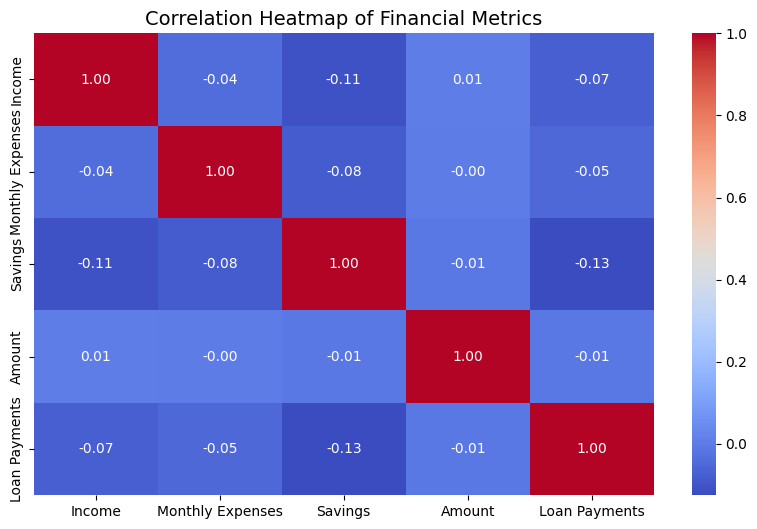

In [88]:
# Heatmap for all financial metrics
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Financial Metrics", fontsize=14)
plt.show()


### Main Takeaways:

#### Weak Relationships Across Metrics:
- No strong correlations indicate that financial behaviors (income, savings, expenses) are driven by multiple, unobserved factors like lifestyle, family size, or financial discipline.

#### Loan Payments Impact Savings:
- The only notable relationship is a weak negative correlation between loan payments and savings, implying that debt obligations slightly reduce the ability to save.

#### Income Doesn't Strongly Impact Other Metrics:
- Higher income doesn't significantly drive spending, savings, or loan payments, pointing to diverse financial habits across families.
---

# Financial Scoring Model

## Objective:
The objective of this model is to evaluate each family's financial health by assigning a score based on various factors that influence their financial stability. The score will range from 0 to 100, where a higher score indicates better financial health.

## Factors to Include:
1. **Savings-to-Income Ratio**:
   - This measures how much of the family’s income is being saved. A higher ratio indicates better savings behavior.

2. **Monthly Expenses as a percentage of Income**:
   - This factor evaluates how much of the family’s income is spent. A lower percentage is preferable as it indicates controlled spending.

3. **Loan Payments as a percentage of Income**:
   - This measures the proportion of income spent on loan repayments. A lower ratio is better as it suggests less financial strain from loans.

4. **Credit Card Spending Trends**:
   - This factor evaluates the family’s spending on credit cards. Stable or decreasing credit card spending is considered better, as it reflects financial control.

5. **Spending Category Distribution**:
   - This evaluates discretionary spending (e.g., travel, entertainment). High spending in non-essential categories like travel/entertainment may lower the score, indicating less focus on essential needs.

6. **Financial Goals Met (%)**:
   - This factor measures the percentage of financial goals met by the family. A higher percentage reflects better financial planning and goal achievement.

## Scoring Logic and Weights:
The final score is calculated by evaluating the above factors. Each factor will be assigned a weight based on its importance in determining financial health. The weights are as follows:
- **Savings-to-Income Ratio**: 20%
- **Monthly Expenses as a percentage of Income**: 25%
- **Loan Payments as a percentage of Income**: 20%
- **Credit Card Spending Trends**: 15%
- **Spending Category Distribution**: 10%
- **Financial Goals Met (%)**: 10%

## Justification for Weights:
- **Savings-to-Income Ratio (20%)**: This is an important indicator of long-term financial security. The more a family saves from their income, the more financially stable they are.
  
- **Monthly Expenses as a percentage of Income (25%)**: Managing monthly expenses is critical for avoiding debt and ensuring there’s enough left for savings. This has the highest weight as it reflects essential financial management.

- **Loan Payments as a percentage of Income (20%)**: High loan payments can indicate financial strain, making it a key factor in determining financial health.

- **Credit Card Spending Trends (15%)**: Excessive credit card spending can indicate poor financial discipline and contribute to debt, so it has a moderate weight.

- **Spending Category Distribution (10%)**: Discretionary spending such as travel or entertainment can lower the score if it detracts from savings or essentials. This is less important than the other factors but still noteworthy.

- **Financial Goals Met (%) (10%)**: Meeting financial goals is a reflection of good planning and discipline, and while important, it has a lower weight compared to spending and savings behaviors.

## Approach:
The scoring for each family member will be calculated based on the above criteria, and the final family score will be derived by aggregating individual scores. Families with better financial practices will receive higher scores.



In [252]:
df_new = df.groupby(['Family ID' , 'Member ID', 'Category',	'Income','Savings',	'Monthly Expenses'	,'Loan Payments',	'Credit Card Spending',	'Dependents',	'Financial Goals Met (%)'])['Amount'].sum().reset_index()
df_new.head(7)

,Family ID,Member ID,Category,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Amount
0,FAM001,FAM001_Member1,Education,113810,20234,5781,2422,2959,2,68,656.60
1,FAM001,FAM001_Member1,Entertainment,113810,20234,5781,2422,2959,2,68,1637.63
2,FAM001,FAM001_Member1,Food,113810,20234,5781,2422,2959,2,68,530.46
3,FAM001,FAM001_Member1,Groceries,113810,20234,5781,2422,2959,2,68,531.89
4,FAM001,FAM001_Member1,Healthcare,113810,20234,5781,2422,2959,2,68,1086.53
5,FAM001,FAM001_Member1,Travel,113810,20234,5781,2422,2959,2,68,947.32
6,FAM001,FAM001_Member1,Utilities,113810,20234,5781,2422,2959,2,68,1130.77


In [254]:
# Aggregate data by Family ID
family_data = df_new.groupby("Family ID").agg(
    Income=("Income", "first"),
    Savings=("Savings", "first"),
    Monthly_Expenses=("Monthly Expenses", "first"),
    Loan_Payments=("Loan Payments", "first"),
    Credit_Card_Spending=("Credit Card Spending", "sum"),
    Financial_Goals_Met=("Financial Goals Met (%)", "first"),
    Total_Spending=("Amount", "sum"),
    Non_essential_Spending=("Amount", lambda x: x[df.loc[x.index, "Category"].isin(["Travel", "Entertainment"])].sum())
).reset_index()

# Calculate financial factors
family_data["Savings_to_Income_Ratio"] = family_data["Savings"] / family_data["Income"]
family_data["Monthly_Expenses_Percentage"] = family_data["Monthly_Expenses"] / family_data["Income"]
family_data["Loan_Payments_Percentage"] = family_data["Loan_Payments"] / family_data["Income"]
family_data["Spending_Category_Distribution"] = family_data["Non_essential_Spending"] / family_data["Total_Spending"]
family_data["Financial_Goals_Met_Ratio"] = family_data["Financial_Goals_Met"] / 100

In [255]:
family_data.head(7)

,Family ID,Income,Savings,Monthly_Expenses,Loan_Payments,Credit_Card_Spending,Financial_Goals_Met,Total_Spending,Non_essential_Spending,Savings_to_Income_Ratio,Monthly_Expenses_Percentage,Loan_Payments_Percentage,Spending_Category_Distribution,Financial_Goals_Met_Ratio
0,FAM001,113810,20234,5781,2422,76934,68,23188.90,8434.27,0.177788,0.050795,0.021281,0.363720,0.68
1,FAM002,44592,29492,5630,4541,31840,60,22309.71,5936.39,0.661374,0.126256,0.101834,0.266090,0.60
2,FAM003,33278,11365,5282,1042,39452,100,11220.34,6854.98,0.341517,0.158723,0.031312,0.610942,1.00
3,FAM004,127196,30735,3591,1571,19372,82,23483.10,8154.20,0.241635,0.028232,0.012351,0.347237,0.82
4,FAM005,66048,1212,3136,3444,94178,89,40246.21,10766.65,0.018350,0.047481,0.052144,0.267520,0.89
5,FAM006,62098,48323,2673,3105,64368,24,16943.25,4238.22,0.778173,0.043045,0.050002,0.250142,0.24
6,FAM007,59256,48164,6486,1425,90160,99,26592.96,6358.64,0.812812,0.109457,0.024048,0.239110,0.99


In [256]:
# Calculate financial score
weights = {
    "Savings_to_Income_Ratio": 0.25,
    "Monthly_Expenses_Percentage": 0.2,
    "Loan_Payments_Percentage": 0.15,
    "Credit_Card_Spending": 0.15,
    "Spending_Category_Distribution": 0.1,
    "Financial_Goals_Met_Ratio": 0.15,
}

family_data["Score"] = (
    weights["Savings_to_Income_Ratio"] * family_data["Savings_to_Income_Ratio"] +
    weights["Monthly_Expenses_Percentage"] * (1 - family_data["Monthly_Expenses_Percentage"]) +
    weights["Loan_Payments_Percentage"] * (1 - family_data["Loan_Payments_Percentage"]) +
    weights["Credit_Card_Spending"] * (1 - family_data["Credit_Card_Spending"] / family_data["Income"]) +
    weights["Spending_Category_Distribution"] * (1 - family_data["Spending_Category_Distribution"]) +
    weights["Financial_Goals_Met_Ratio"] * family_data["Financial_Goals_Met_Ratio"]
) * 100

In [257]:
family_data.head(7)

,Family ID,Income,Savings,Monthly_Expenses,Loan_Payments,Credit_Card_Spending,Financial_Goals_Met,Total_Spending,Non_essential_Spending,Savings_to_Income_Ratio,Monthly_Expenses_Percentage,Loan_Payments_Percentage,Spending_Category_Distribution,Financial_Goals_Met_Ratio,Score
0,FAM001,113810,20234,5781,2422,76934,68,23188.90,8434.27,0.177788,0.050795,0.021281,0.363720,0.68,59.532573
1,FAM002,44592,29492,5630,4541,31840,60,22309.71,5936.39,0.661374,0.126256,0.101834,0.266090,0.60,68.110382
2,FAM003,33278,11365,5282,1042,39452,100,11220.34,6854.98,0.341517,0.158723,0.031312,0.610942,1.00,56.001431
3,FAM004,127196,30735,3591,1571,19372,82,23483.10,8154.20,0.241635,0.028232,0.012351,0.347237,0.82,71.834093
4,FAM005,66048,1212,3136,3444,94178,89,40246.21,10766.65,0.018350,0.047481,0.052144,0.267520,0.89,48.013255
5,FAM006,62098,48323,2673,3105,64368,24,16943.25,4238.22,0.778173,0.043045,0.050002,0.250142,0.24,63.393661
6,FAM007,59256,48164,6486,1425,90160,99,26592.96,6358.64,0.812812,0.109457,0.024048,0.239110,0.99,67.406332


In [268]:
# Sort by Score and select top 5 families
top_families = family_data[["Family ID", "Score"]].sort_values(by="Score", ascending=False).head(5)
top_families 

,Family ID,Score
56,FAM057,82.646941
60,FAM061,82.306893
170,FAM171,81.567130
118,FAM119,81.305835
53,FAM054,80.868466


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18772\3992029205.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(family_data["Score"], shade=True, color="blue")


Text(0, 0.5, 'Density')

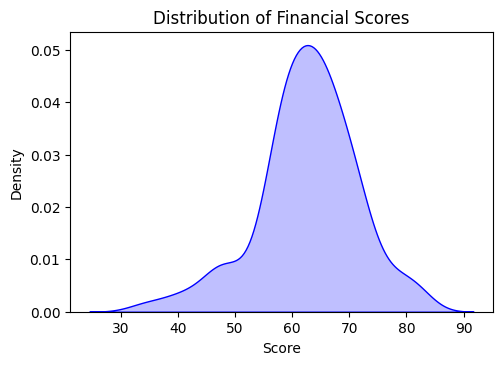

In [269]:
# Step 3: Plot Normal Distribution using Seaborn
plt.figure(figsize=(12, 8))

# Distribution of financial scores
plt.subplot(2, 2, 1)
sns.kdeplot(family_data["Score"], shade=True, color="blue")
plt.title("Distribution of Financial Scores")
plt.xlabel("Score")
plt.ylabel("Density")


In [261]:
# Step 1: Spending distribution across categories
category_distribution = df.groupby("Category")["Amount"].sum()
category_distribution


Category
Education        591955.12
Entertainment    615070.77
Food             604377.40
Groceries        606010.58
Healthcare       566692.27
Travel           586987.31
Utilities        609251.87
Name: Amount, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Food'),
  Text(3, 0, 'Groceries'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Travel'),
  Text(6, 0, 'Utilities')])

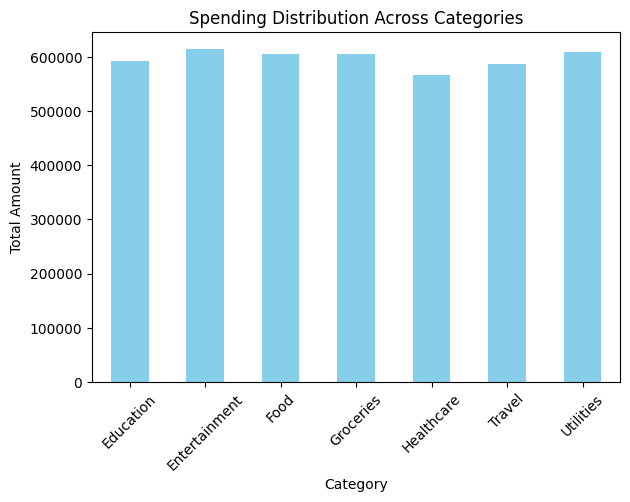

In [263]:
# Plotting
plt.figure(figsize=(15, 10))

# Spending distribution across categories
plt.subplot(2, 2, 1)
category_distribution.plot(kind="bar", color="skyblue")
plt.title("Spending Distribution Across Categories")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)


In [287]:
# Step 3: Member-wise spending trends
member_spending = df_new.groupby(["Member ID"])["Amount"].sum()
member_spending

Member ID
FAM001_Member1    6521.20
FAM001_Member2    7084.83
FAM001_Member3    2119.41
FAM001_Member4    7463.46
FAM002_Member1    3082.90
                   ...   
FAM200_Member2    2103.85
FAM200_Member3    4671.33
FAM200_Member4    3739.52
FAM200_Member5    5408.28
FAM200_Member6    1837.73
Name: Amount, Length: 926, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18772\729294314.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(member_spending, shade=True, color="blue")


Text(0, 0.5, 'Density')

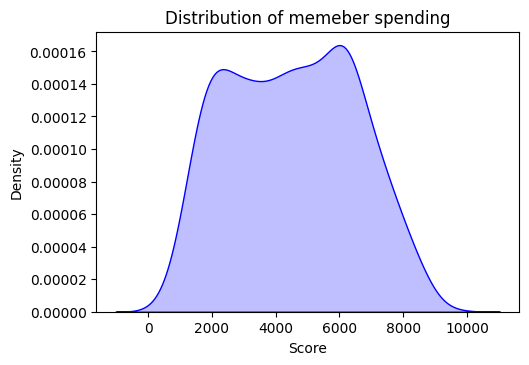

In [289]:
# Step 3: Plot Normal Distribution using Seaborn
plt.figure(figsize=(12, 8))

# Distribution of financial scores
plt.subplot(2, 2, 1)
sns.kdeplot(member_spending, shade=True, color="blue")
plt.title("Distribution of memeber spending")
plt.xlabel("Score")
plt.ylabel("Density")


In [294]:
# Step 3: Member-wise spending trends
member_spending = df.groupby(["Member ID", "Category"])["Amount"].sum().unstack(fill_value=0)
member_spending 

Category,Education,Entertainment,Food,Groceries,Healthcare,Travel,Utilities
Member ID,,,,,,,
FAM001_Member1,656.60,1637.63,530.46,531.89,1086.53,947.32,1130.77
FAM001_Member2,156.57,189.81,2041.37,1470.32,489.36,1864.03,873.37
FAM001_Member3,874.03,425.61,245.31,276.33,0.00,276.37,21.76
FAM001_Member4,563.81,1915.81,1563.78,1132.07,0.00,1489.09,798.90
FAM002_Member1,758.41,425.89,552.49,39.19,1002.21,117.47,187.24
...,...,...,...,...,...,...,...
FAM200_Member2,375.48,217.31,642.95,0.00,321.97,90.29,455.85
FAM200_Member3,80.83,605.97,950.19,534.88,938.24,331.92,1229.30
FAM200_Member4,333.47,619.56,558.71,627.67,438.47,624.36,537.28
